# Работа с Excel

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

1. На листе "Рецептура" файла `себестоимостьА_в1.xlsx` для области "Пшеничный хлеб" рассчитать себестоимость всех видов продукции.

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xlwings as xw

workbook = xw.Book('data/себестоимостьА_в1.xlsx')
recepts = workbook.sheets['Рецептура']

In [2]:
matrix = np.array(recepts.range('G7:O10').value, dtype=float)
matrix = np.nan_to_num(matrix, copy=False)
print(matrix, '\n')

vec = np.array(recepts.range('G14:O14').value, dtype=float)
print(vec, '\n')

result = matrix.dot(vec)
print("Результат:", result)

[[0.2   0.4   0.02  0.02  0.01  0.005 0.1   0.    0.   ]
 [0.07  0.25  0.01  0.06  0.015 0.    0.06  0.05  0.   ]
 [0.12  0.22  0.005 0.    0.009 0.005 0.    0.05  0.03 ]
 [0.12  0.23  0.01  0.    0.015 0.    0.    0.    0.05 ]] 

[  7.  10. 184.  19.   7. 290. 105.  83. 260.] 

Результат: [21.48  16.525 17.423 18.085]


2. Результаты расчетов 1.1 сохранить в отдельном столбце области "Пшеничный хлеб"

In [3]:
title = recepts['P5:Q6']
title.api.Merge()
title.api.WrapText = True
title.api.VerticalAlignment = xw.constants.VAlign.xlVAlignCenter
title.value = 'Себестоимость'
title.font.bold = True

In [4]:
recepts['P7:P10'].options(transpose=True).value = result

3. Приблизить форматирование столбца, добавленного в задаче 2 к оформлению всей области.

In [5]:
recepts['P7:Q10'].number_format = '0,00'

4. Выполнить 3 с помощью "протягиваемых" формул.

In [6]:
products = recepts['G7:O7'].get_address(row_absolute=False, column_absolute=False)
price = recepts['G14:O14'].address
formula = f'=SUMPRODUCT({products}, {price})'
formula

'=SUMPRODUCT(G7:O7, $G$14:$O$14)'

In [7]:
recepts['Q7:Q10'].formula = formula

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [8]:
reviews = pd.read_csv('data/reviews_sample.csv')
reviews.rename(columns={'Unnamed: 0':'unnamed'}, inplace=True)
reviews

,unnamed,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126692,158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


In [9]:
recipes = pd.read_csv('data/recipes_sample.csv')
recipes = recipes[['id', 'name', 'minutes', 'submitted', 'description', 'n_ingredients']]
recipes

,id,name,minutes,submitted,description,n_ingredients
0,44123,george s at the cove black bean soup,90,2002-10-25,an original recipe created by chef scott meska...,18.0
1,67664,healthy for them yogurt popsicles,10,2003-07-26,my children and their friends ask for my homem...,NaN
2,38798,i can t believe it s spinach,30,2002-08-29,"these were so go, it surprised even me.",8.0
3,35173,italian gut busters,45,2002-07-27,my sister-in-law made these for us at a family...,NaN
4,84797,love is in the air beef fondue sauces,25,2004-02-23,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...
29995,267661,zurie s holey rustic olive and cheddar bread,80,2007-11-25,this is based on a french recipe but i changed...,10.0
29996,386977,zwetschgenkuchen bavarian plum cake,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11.0
29997,103312,zwiebelkuchen southwest german onion cake,75,2004-11-03,this is a traditional late summer early fall s...,NaN
29998,486161,zydeco soup,60,2012-08-29,this is a delicious soup that i originally fou...,NaN


2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [10]:
reviews_sample = reviews.sample(frac=0.05)
reviews_sample

,unnamed,user_id,recipe_id,date,rating,review
122618,1080704,1701315,457972,2011-06-19,5,This is a stand-out fried rice recipe! Both D...
83885,575714,33747,15242,2003-09-24,5,This is an awsome dish! My changes were using ...
23794,783800,2002085498,197189,2018-03-30,5,This is a great recipe I have made it several ...
65638,178872,168896,28409,2007-02-06,5,great recipe. major alterations made due to n...
10596,888736,356034,103175,2008-12-20,5,"they were pretty easy to make, and a ton of fu..."
...,...,...,...,...,...,...
105193,901587,1389119,110548,2009-09-19,4,Pretty close to the original. Follow bzsoccer...
100144,1074842,1647285,135350,2013-12-31,0,Anyone who is complaining about this recipe di...
40578,901468,153878,79275,2004-07-24,5,Absolutely wonderful!! Thank you
104217,733151,372163,92778,2007-06-13,4,"Truly simple, very attractive to serve and ver..."


In [11]:
recipes_sample = recipes.sample(frac=0.05)
recipes_sample

,id,name,minutes,submitted,description,n_ingredients
26786,535269,sweet tea baby back ribs,1560,2018-03-05,"courtesy of deborah van treece, twisted soul",14.0
9188,185231,death by chocolate,5,2006-09-07,pour this into a hurricane glass and enjoy.,NaN
25357,420001,spicy cilantro peanut chicken,45,2010-04-12,"a simple chicken dish with a spicy, tangy pean...",11.0
5054,270742,cheap easy clam sauce for pasta,15,2007-12-09,super cheap if you tend to keep garlic and oli...,8.0
14,149593,add in anything muffins,15,2005-12-28,"this is a never-fail muffin recipe, it's a bla...",9.0
...,...,...,...,...,...,...
21575,278753,priscilla s grilled chicken skewers,40,2008-01-14,it's a blend of thai flavor and my own concoct...,15.0
14662,165758,italian herb muffins,25,2006-04-25,these savory muffins are an adaptation of a mu...,NaN
29082,165988,watermelon salad with lime dressing,15,2006-04-27,"an unusual salad featuring watermelon, co-star...",10.0
5870,190114,chicken panang curry,50,2006-10-13,my girlfriend made this for me once when she w...,10.0


In [12]:
recipes_book = xw.Book()
recipes_sht = recipes_book.sheets.add(name="Рецепты")
reviews_sht = recipes_book.sheets.add(name="Отзывы", after="Рецепты")
recipes_sht.select() # Выбрать текущий активный лист

In [13]:
recipes_sht.range('B2').value = recipes_sample
reviews_sht.range('B2').value = reviews_sample
recipes_sht.autofit(axis="columns")
reviews_sht.autofit(axis="columns")
recipes_book.save('result/recipes.xlsx')

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [14]:
recipes_sht.range('I2').value = 'seconds_assign'
minutes = np.array(recipes_sht.range('E3').options(transpose=True).expand('down').value)
seconds = minutes * 60
recipes_sht.range('I3').options(transpose=True).value = seconds

4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [15]:
recipes_sht.range('J2').value = 'seconds_formula'
formula = '=E3*60'
recipes_sht.range(f'J3:J{recipes_sample.shape[0] + 2}').formula = formula

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [16]:
column_names = recipes_sht['C2:K2']
column_names.font.bold = True
column_names.api.HorizontalAlignment = xw.constants.HAlign.xlHAlignCenter

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [17]:
for i in range(3, recipes_sample.shape[0] + 3):
    cell = recipes_sht[f'E{i}']
    color = ();
    if (cell.value <= 5):
        color = (0x00, 0xff, 0x00)
    elif (cell.value > 5 and cell.value <= 10):
        color = (0xff, 0xff, 0x00)
    else:
        color = (0xff, 0x00, 0x00)
    cell.color = color

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [18]:
recipes_sht.range('K2').value = 'n_reviews'
recipe_ids = reviews_sht.range(f'E3:E{reviews_sample.shape[0] + 2}').address
formula = f'=COUNTIF({reviews_sht.name}!{recipe_ids}, C3)'

In [19]:
recipes_sht.range(f'K3:K{recipes_sample.shape[0] + 2}').formula = formula
recipes_book.save('result/recipes.xlsx')

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [16]:
def validate(reviews_sheet, index, recipes_sheet, recipes_size) -> bool:
    address = recipes_sheet.range(f'C3:C{recipes_size + 2}').address
    formula = f'=COUNTIF({recipes_sheet.name}!{address}, E{index})'
    reviews_sheet['J1'].formula = formula
    count_id = reviews_sheet['J1'].value
    rating = reviews_sheet[f'G{index}'].value
    state: bool = (rating >= 0) and (rating <= 5) and (count_id > 0)
    reviews_sheet[f'G{index}'].value = None
    return state

In [17]:
recipes_size = recipes_sample.shape[0]
reviews_size = reviews_sample.shape[0]

for i in range(3, reviews_size + 3):
    status = validate(reviews_sht, i, recipes_sht, recipes_size)
    if not status:
        reviews_sht.range(f'B{i}:H{i}').color = (0xff, 0x00, 0x00)

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [44]:
with open('data/recipes_model.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f, dialect='excel-tab')
    model = pd.DataFrame([row for row in reader]).values

In [46]:
model_sht = recipes_book.sheets.add(name="Модель", after="Отзывы")
model_sht.select()
model_sht['A2'].value = model

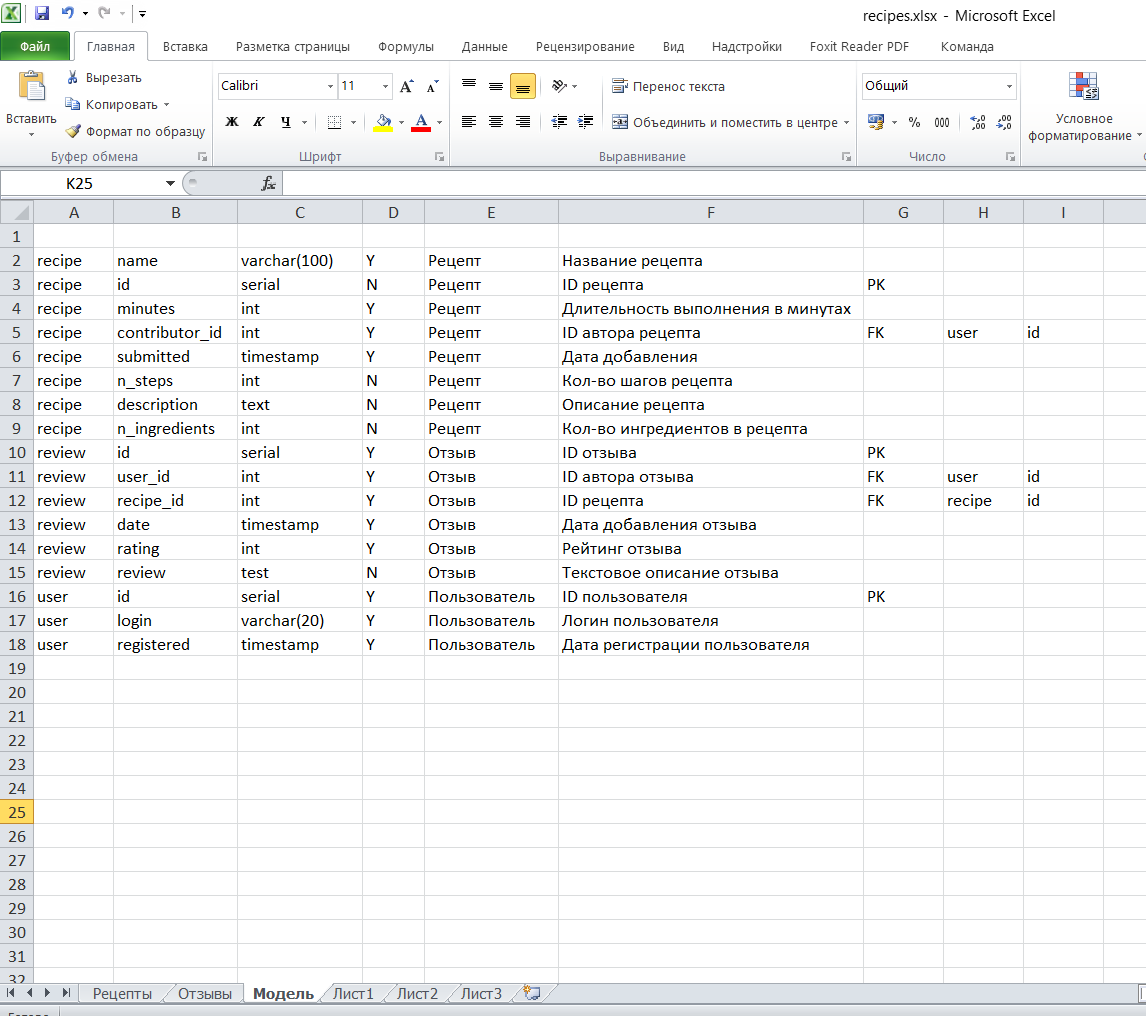

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [55]:
# reference:
# CONCATENATE: https://support.microsoft.com/en-us/office/concatenate-function-8f8ae884-2ca8-4f7a-b093-75d702bea31d
# UPPER: https://support.microsoft.com/en-us/office/upper-function-c11f29b3-d1a3-4537-8df6-04d0049963d6
# T: https://support.microsoft.com/en-us/office/t-function-fb83aeec-45e7-4924-af95-53e073541228
# SUBSTITUTE: https://support.microsoft.com/en-us/office/substitute-function-6434944e-a904-4336-a9b0-1e58df3bc332

# Формула для Excel на русском:
# =СЦЕПИТЬ(B3; " "; ПРОПИСН(C3); " "; ПОДСТАВИТЬ(ПОДСТАВИТЬ(Т(G3); "PK"; "PRIMARY KEY"); "FK"; СЦЕПИТЬ("REFERENCES "; Т(H3); "("; Т(I3); ")"; ПОДСТАВИТЬ(Т(D3); "Y"; " NOT NULL"))))

formula = '=CONCATENATE(B2, " ", UPPER(C2), " ", SUBSTITUTE(SUBSTITUTE(T(G2), "PK", "PRIMARY KEY"), "FK", CONCATENATE("REFERENCES ", T(H2), "(", T(I2), ")", SUBSTITUTE(T(D2), "Y", " NOT NULL"))))'
model_sht[f'J2:J{model.shape[0] + 1}'].formula = formula

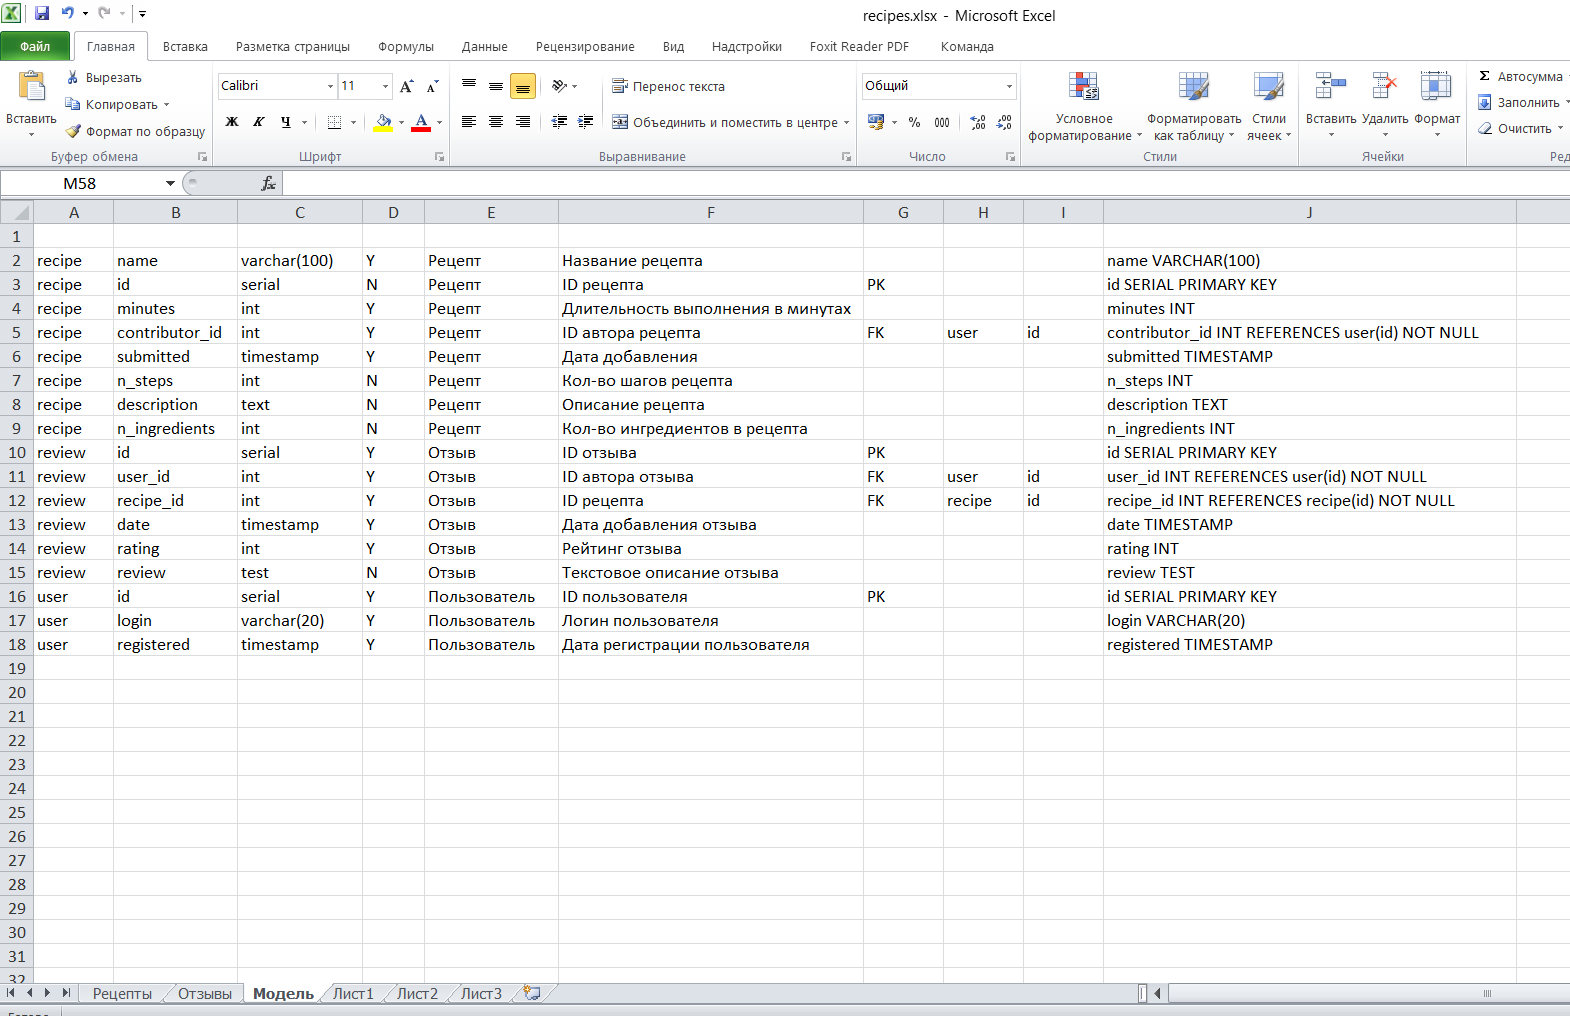

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [69]:
titles = model_sht.range('A1:J1')
titles.value = [
    'Имя таблицы', 'Имя столбца', 'Тип данных', 'Обязательно к заполнению',
    'Тип записи', 'Описание', 'Ключ', 'Таблица', 'Столбец', 'Описание на языке SQL'
]
titles.color = 0x00ccff
model_sht.autofit(axis="columns")
titles.font.bold = True
model_sht['A1:J18'].api.AutoFilter(Field:=1) # adding auto-filter

True

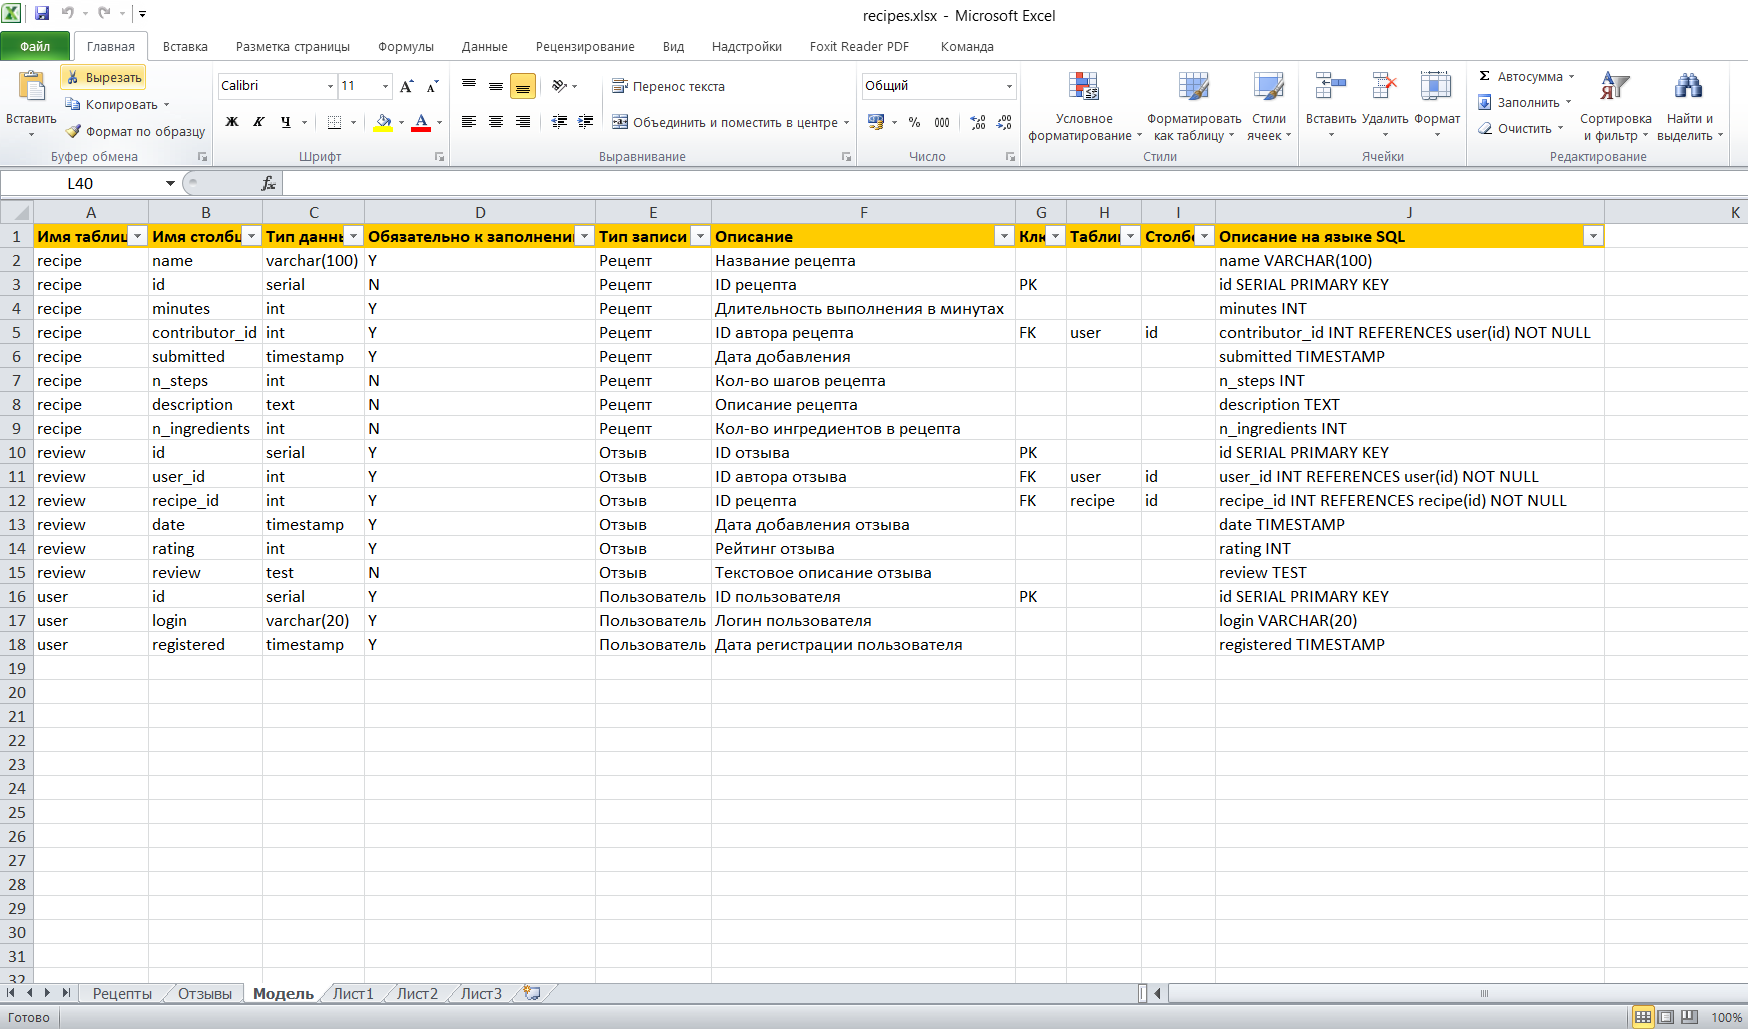

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 

In [70]:
stat_sht = recipes_book.sheets.add(name='Статистика', after='Модель')
stat_sht.select()

In [74]:
stat_sht['A1:C1'].value = ['recipe', 'review', 'user']
address = model_sht['A1:A18'].address
formula = f'=COUNTIF({model_sht.name}!{address}, A1)'
stat_sht['A2:C2'].formula = formula
stat_sht.autofit(axis="columns")

<AxesSubplot:>

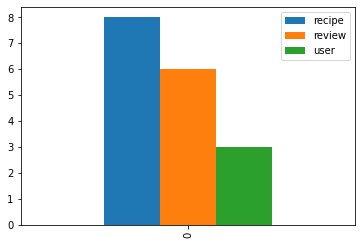

In [98]:
stat_data = stat_sht.range('A1').options(pd.DataFrame, expand='table').value
stat_data = stat_data.reset_index(level=0)
stat_plot = stat_data.plot.bar()
stat_plot

In [100]:
stat_sht.pictures.add(stat_plot.figure, name='Статистика', update=True, anchor=stat_sht['E2'])

<Picture 'Статистика' in <Sheet [recipes.xlsx]Статистика>>

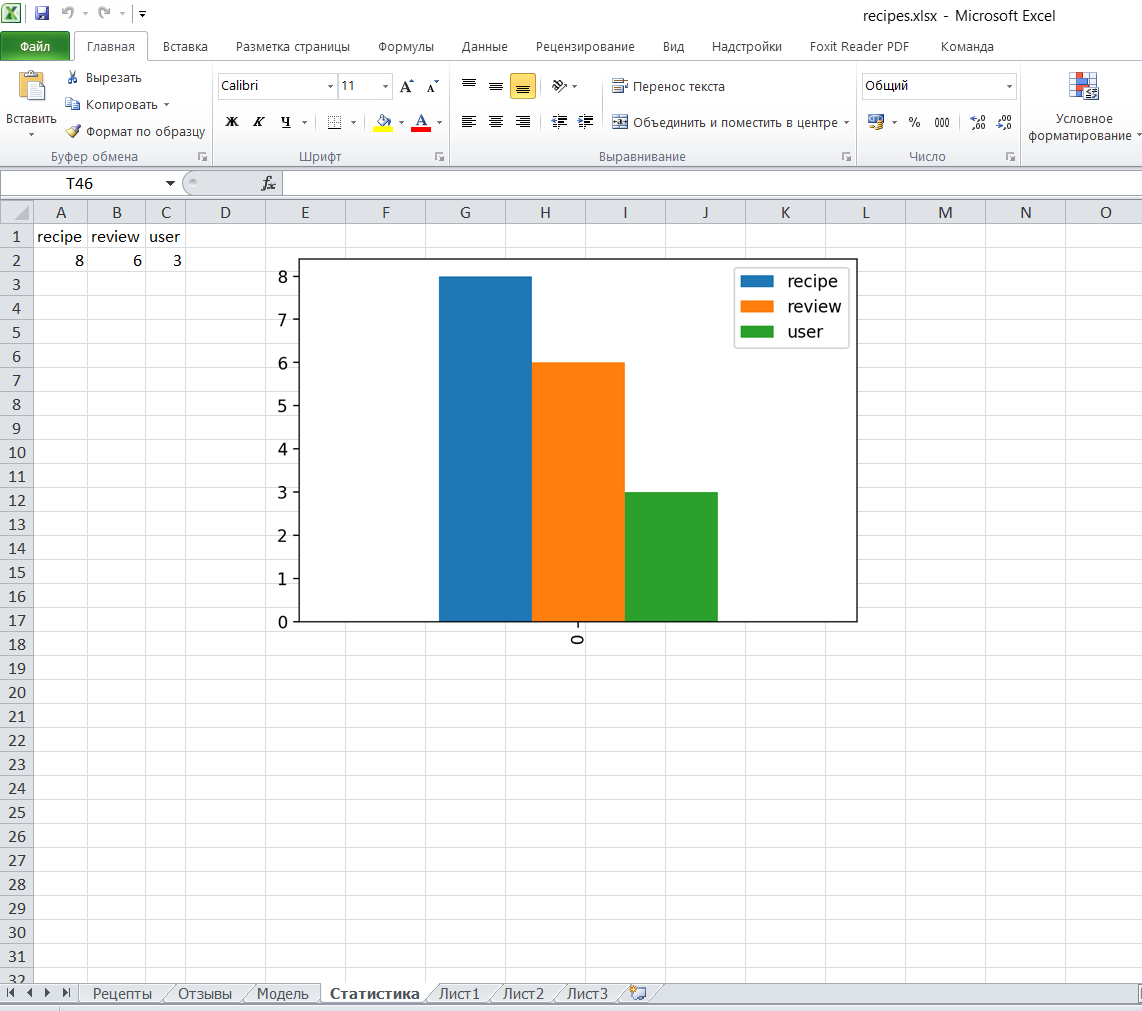

In [101]:
recipes_book.save('result/recipes.xlsx')